In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
'''
import zipfile

with zipfile.ZipFile("voice_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("voice_dataset")
'''

In [ ]:
'''
import ffmpeg

# Print ffmpeg version using ffmpeg-python
print(ffmpeg.probe.__module__)
try:
	version_info = ffmpeg.probe('dummy', v='error')
except ffmpeg.Error as e:
	print("ffmpeg-python is installed and working. To check the actual ffmpeg version, ensure ffmpeg.exe is in your PATH.")'''

In [2]:
import os
import subprocess
import glob

# Input base folder containing subfolders with .opus files
input_folder = r"C:\Users\tejas\Downloads\voice_dataset\Project_self_dataset"

# Output base folder where converted .wav files will go
output_folder = r"wav_dataset\project_self_dataset"

# Collect all .opus files from subfolders
opus_files = glob.glob(os.path.join(input_folder, "**", "*.opus"), recursive=True)

print(f"Found {len(opus_files)} OPUS files.")

# Loop through and convert each .opus to .wav
for opus_file in opus_files:
    # Get relative path from input base
    relative_path = os.path.relpath(opus_file, input_folder)

    # Change extension to .wav
    relative_wav_path = os.path.splitext(relative_path)[0] + ".wav"

    # Full path to output .wav file
    output_wav_path = os.path.join(output_folder, relative_wav_path)

    # Ensure output subfolder exists
    os.makedirs(os.path.dirname(output_wav_path), exist_ok=True)

    # FFmpeg command to convert .opus to .wav
    command = ["ffmpeg", "-y", "-i", opus_file, output_wav_path]

    try:
        subprocess.run(command, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print(f"Converted: {relative_path} ➝ {relative_wav_path}")
    except subprocess.CalledProcessError:
        print(f"Failed to convert: {relative_path}")

print("All conversions done.")



Found 124 OPUS files.
Converted: Anger Audio\Anger_10.opus ➝ Anger Audio\Anger_10.wav
Converted: Anger Audio\Anger_11.opus ➝ Anger Audio\Anger_11.wav
Converted: Anger Audio\Anger_12.opus ➝ Anger Audio\Anger_12.wav
Converted: Anger Audio\Anger_13.opus ➝ Anger Audio\Anger_13.wav
Converted: Anger Audio\Anger_14.opus ➝ Anger Audio\Anger_14.wav
Converted: Anger Audio\Anger_15.opus ➝ Anger Audio\Anger_15.wav
Converted: Anger Audio\Anger_16.opus ➝ Anger Audio\Anger_16.wav
Converted: Anger Audio\Anger_17.opus ➝ Anger Audio\Anger_17.wav
Converted: Anger Audio\Anger_18.opus ➝ Anger Audio\Anger_18.wav
Converted: Anger Audio\ANger_19.opus ➝ Anger Audio\ANger_19.wav
Converted: Anger Audio\Anger_20.opus ➝ Anger Audio\Anger_20.wav
Converted: Anger Audio\Anger_21.opus ➝ Anger Audio\Anger_21.wav
Converted: Anger Audio\Anger_22.opus ➝ Anger Audio\Anger_22.wav
Converted: Anger Audio\Anger_23.opus ➝ Anger Audio\Anger_23.wav
Converted: Anger Audio\Anger_24.opus ➝ Anger Audio\Anger_24.wav
Converted: Anger A

In [3]:
audio_files = glob.glob("wav_dataset/**/*.wav", recursive=True)
print(f"Total audio files found: {len(audio_files)}")

Total audio files found: 124


In [4]:
import librosa
import numpy as np
y, sr = librosa.load(audio_files[0])
y = np.asarray(y, dtype=np.float64)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-8.27991244e-06 -3.25295186e-05 -2.96735307e-05 -2.95481095e-05
  4.75296474e-06  1.40226466e-05 -2.93505000e-05  5.61507841e-06
  3.49127695e-05  2.83427908e-05]
shape y: (44494,)
sr: 22050


In [5]:
import os
import librosa
from tqdm import tqdm
import glob
import shutil

# Path to the extracted dataset folder
AUDIO_DIR = r"wav_dataset/project_self_dataset"  # or your folder name

# Folder to store only cleaned audio
CLEANED_DIR = "cleaned_audio"
os.makedirs(CLEANED_DIR, exist_ok=True)

In [6]:
#Audio cleaning function
import soundfile as sf
import noisereduce as nr
def clean_audio_file(input_path, output_path,
                     target_sr=22050,
                     min_duration=0.5,
                     max_duration=10.0,
                     normalize=True,
                     reduce_noise=False):
    # Load audio, convert to mono, and resample
    y, sr = librosa.load(input_path, sr=target_sr, mono=True)
    
    # Trim silence
    y, _ = librosa.effects.trim(y, top_db=25)
    
    # Duration filtering
    duration = librosa.get_duration(y=y, sr=sr)
    if duration < min_duration or duration > max_duration:
        print(f"Skipping {input_path}: duration {duration:.2f}s out of range.")
        return False
    
    # Volume normalization (peak normalization)
    if normalize:
        y = y / np.max(np.abs(y))
    
    # Save cleaned audio
    sf.write(output_path, y, sr)
    print(f"Cleaned and saved: {output_path}")
    return True

C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#Run Cleaning and Copy Clean Files
audio_files = glob.glob(os.path.join(AUDIO_DIR,'**', "*.wav"))

print(f"Found {len(audio_files)} audio files. Cleaning...")

cleaned_count = 0
for file_path in tqdm(audio_files):
    if clean_audio_file(input_path=file_path,output_path=os.path.join(CLEANED_DIR, os.path.basename(file_path)),target_sr=22050,
        min_duration=0.5,max_duration=10.0,normalize=True,reduce_noise=True):
        filename = os.path.basename(file_path)
        shutil.copy(file_path, os.path.join(CLEANED_DIR, filename))
        cleaned_count += 1

print(f"Cleaned {cleaned_count} usable audio files saved in: {CLEANED_DIR}")

Found 124 audio files. Cleaning...


  8%|▊         | 10/124 [00:08<01:08,  1.65it/s]

Cleaned and saved: cleaned_audio\Anger_10.wav
Cleaned and saved: cleaned_audio\Anger_11.wav
Cleaned and saved: cleaned_audio\Anger_12.wav
Cleaned and saved: cleaned_audio\Anger_13.wav
Cleaned and saved: cleaned_audio\Anger_14.wav
Skipping wav_dataset/project_self_dataset\Anger Audio\Anger_15.wav: duration 0.49s out of range.
Cleaned and saved: cleaned_audio\Anger_16.wav
Skipping wav_dataset/project_self_dataset\Anger Audio\Anger_17.wav: duration 0.49s out of range.
Cleaned and saved: cleaned_audio\Anger_18.wav
Cleaned and saved: cleaned_audio\ANger_19.wav
Cleaned and saved: cleaned_audio\Anger_20.wav
Cleaned and saved: cleaned_audio\Anger_21.wav
Cleaned and saved: cleaned_audio\Anger_22.wav
Cleaned and saved: cleaned_audio\Anger_23.wav
Skipping wav_dataset/project_self_dataset\Anger Audio\Anger_24.wav: duration 0.33s out of range.
Skipping wav_dataset/project_self_dataset\Anger Audio\Anger_25.wav: duration 0.49s out of range.
Cleaned and saved: cleaned_audio\Anger_26.wav
Cleaned and sa

 23%|██▎       | 28/124 [00:08<00:14,  6.48it/s]

Cleaned and saved: cleaned_audio\Anger_29.wav
Cleaned and saved: cleaned_audio\Anger_3.wav
Cleaned and saved: cleaned_audio\Anger_30.wav
Cleaned and saved: cleaned_audio\Anger_31.wav
Cleaned and saved: cleaned_audio\Anger_4.wav
Cleaned and saved: cleaned_audio\Anger_5.wav
Cleaned and saved: cleaned_audio\Anger_6.wav
Cleaned and saved: cleaned_audio\Anger_7.wav
Cleaned and saved: cleaned_audio\Anger_8.wav
Cleaned and saved: cleaned_audio\Anger_9.wav
Cleaned and saved: cleaned_audio\Anger_R.wav
Skipping wav_dataset/project_self_dataset\Anger Audio\Anger_s.wav: duration 0.49s out of range.
Skipping wav_dataset/project_self_dataset\Crying Audio\Cry_10.wav: duration 10.38s out of range.
Cleaned and saved: cleaned_audio\Cry_11.wav
Cleaned and saved: cleaned_audio\Cry_12.wav
Cleaned and saved: cleaned_audio\Cry_13.wav
Cleaned and saved: cleaned_audio\Cry_14.wav


 36%|███▋      | 45/124 [00:08<00:05, 14.23it/s]

Cleaned and saved: cleaned_audio\Cry_15.wav
Cleaned and saved: cleaned_audio\Cry_16.wav
Cleaned and saved: cleaned_audio\Cry_17.wav
Cleaned and saved: cleaned_audio\Cry_18.wav
Cleaned and saved: cleaned_audio\Cry_19.wav
Cleaned and saved: cleaned_audio\Cry_20.wav
Cleaned and saved: cleaned_audio\Cry_21.wav
Cleaned and saved: cleaned_audio\Cry_22.wav
Cleaned and saved: cleaned_audio\Cry_23.wav
Cleaned and saved: cleaned_audio\Cry_24.wav
Cleaned and saved: cleaned_audio\Cry_25.wav
Cleaned and saved: cleaned_audio\Cry_26.wav
Cleaned and saved: cleaned_audio\Cry_27.wav
Cleaned and saved: cleaned_audio\Cry_28.wav
Cleaned and saved: cleaned_audio\Cry_29.wav


 49%|████▉     | 61/124 [00:09<00:02, 24.47it/s]

Cleaned and saved: cleaned_audio\Cry_30.wav
Cleaned and saved: cleaned_audio\Cry_31.wav
Cleaned and saved: cleaned_audio\Cry_32.wav
Cleaned and saved: cleaned_audio\Cry_4.wav
Cleaned and saved: cleaned_audio\Cry_5.wav
Cleaned and saved: cleaned_audio\Cry_6.wav
Cleaned and saved: cleaned_audio\Cry_7.wav
Cleaned and saved: cleaned_audio\Cry_8.wav
Cleaned and saved: cleaned_audio\Cry_9.wav
Cleaned and saved: cleaned_audio\Cry_R.wav
Cleaned and saved: cleaned_audio\Cry_S.wav
Cleaned and saved: cleaned_audio\Laugh_10.wav
Cleaned and saved: cleaned_audio\Laugh_11.wav


 61%|██████▏   | 76/124 [00:09<00:01, 36.81it/s]

Cleaned and saved: cleaned_audio\Laugh_12.wav
Cleaned and saved: cleaned_audio\Laugh_13.wav
Cleaned and saved: cleaned_audio\Laugh_14.wav
Cleaned and saved: cleaned_audio\Laugh_15.wav
Cleaned and saved: cleaned_audio\Laugh_16.wav
Cleaned and saved: cleaned_audio\Laugh_17.wav
Cleaned and saved: cleaned_audio\Laugh_18.wav
Cleaned and saved: cleaned_audio\Laugh_19.wav
Cleaned and saved: cleaned_audio\Laugh_20.wav
Cleaned and saved: cleaned_audio\Laugh_21.wav
Cleaned and saved: cleaned_audio\Laugh_22.wav
Cleaned and saved: cleaned_audio\Laugh_23.wav
Cleaned and saved: cleaned_audio\Laugh_24.wav
Cleaned and saved: cleaned_audio\Laugh_25.wav
Cleaned and saved: cleaned_audio\Laugh_26.wav
Cleaned and saved: cleaned_audio\Laugh_27.wav


 73%|███████▎  | 91/124 [00:09<00:00, 46.01it/s]

Cleaned and saved: cleaned_audio\Laugh_28.wav
Cleaned and saved: cleaned_audio\Laugh_29.wav
Cleaned and saved: cleaned_audio\Laugh_3.wav
Cleaned and saved: cleaned_audio\Laugh_30.wav
Cleaned and saved: cleaned_audio\Laugh_31.wav
Cleaned and saved: cleaned_audio\Laugh_4.wav
Cleaned and saved: cleaned_audio\Laugh_5.wav
Cleaned and saved: cleaned_audio\Laugh_6.wav
Cleaned and saved: cleaned_audio\Laugh_7.wav
Cleaned and saved: cleaned_audio\Laugh_8.wav
Cleaned and saved: cleaned_audio\Laugh_9.wav
Cleaned and saved: cleaned_audio\Laugh_R.wav
Cleaned and saved: cleaned_audio\Laugh_s.wav


 79%|███████▉  | 98/124 [00:09<00:00, 50.44it/s]

Cleaned and saved: cleaned_audio\Neutral_10.wav
Cleaned and saved: cleaned_audio\Neutral_11.wav
Cleaned and saved: cleaned_audio\Neutral_12.wav
Cleaned and saved: cleaned_audio\Neutral_13.wav
Cleaned and saved: cleaned_audio\Neutral_14.wav
Skipping wav_dataset/project_self_dataset\Neutral Audio\Neutral_15.wav: duration 0.46s out of range.
Cleaned and saved: cleaned_audio\Neutral_16.wav
Cleaned and saved: cleaned_audio\Neutral_17.wav
Cleaned and saved: cleaned_audio\Neutral_18.wav
Cleaned and saved: cleaned_audio\Neutral_19.wav
Cleaned and saved: cleaned_audio\Neutral_20.wav
Cleaned and saved: cleaned_audio\Neutral_21.wav


 98%|█████████▊| 122/124 [00:09<00:00, 65.98it/s]

Skipping wav_dataset/project_self_dataset\Neutral Audio\Neutral_22.wav: duration 0.49s out of range.
Cleaned and saved: cleaned_audio\Neutral_23.wav
Cleaned and saved: cleaned_audio\Neutral_24.wav
Cleaned and saved: cleaned_audio\Neutral_25.wav
Cleaned and saved: cleaned_audio\Neutral_26.wav
Cleaned and saved: cleaned_audio\Neutral_27.wav
Cleaned and saved: cleaned_audio\Neutral_28.wav
Cleaned and saved: cleaned_audio\Neutral_29.wav
Cleaned and saved: cleaned_audio\Neutral_3.wav
Cleaned and saved: cleaned_audio\Neutral_30.wav
Cleaned and saved: cleaned_audio\Neutral_31.wav
Cleaned and saved: cleaned_audio\Neutral_4.wav
Cleaned and saved: cleaned_audio\Neutral_5.wav
Cleaned and saved: cleaned_audio\Neutral_6.wav
Skipping wav_dataset/project_self_dataset\Neutral Audio\Neutral_7.wav: duration 0.46s out of range.
Cleaned and saved: cleaned_audio\Neutral_8.wav
Cleaned and saved: cleaned_audio\Neutral_9.wav


100%|██████████| 124/124 [00:09<00:00, 12.49it/s]

Cleaned and saved: cleaned_audio\Neutral_R.wav
Cleaned and saved: cleaned_audio\Neutral_s.wav
Cleaned 115 usable audio files saved in: cleaned_audio


In [9]:
#Data processing
import os
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import io
from PIL import Image

In [10]:
# === CONFIGURATION ===
CLEANED_AUDIO_DIR = "cleaned_audio"  # Folder from cleaning step
SAMPLE_RATE = 22050
N_MFCC = 13

In [11]:
audio_files = glob.glob("cleaned_audio/*.wav", recursive=True)
print(f"Total audio files found: {len(audio_files)}")

Total audio files found: 115


In [12]:
%pip install audiomentations

  Using cached numpy_minmax-0.5.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached python_stretch-0.3.1-cp311-cp311-win_amd64.whl.metadata (3.7 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy_minmax-0.5.0-cp311-cp311-win_amd64.whl (14 kB)
Using cached python_stretch-0.3.1-cp311-cp311-win_amd64.whl (98 kB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.26.4

   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
    Uninstalling numpy-1.26.4:
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- -------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\tejas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import os
import glob
import numpy as np
import librosa
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from sklearn.decomposition import PCA
import joblib

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),
])

features = []
labels = []

file_list = glob.glob(os.path.join(CLEANED_AUDIO_DIR, "*.wav"))
print(f"Extracting features from {len(file_list)} files...")

def extract_label(file_path):
    # Get the filename from the full path
    file_name = os.path.basename(file_path)

    # Split the filename by the underscore
    parts = file_name.split("_")
    if parts:
        emotion_label = parts[0]
    else:
        emotion_label = "unknown"

    return emotion_label

AUG_PER_FILE=5
for file_path in tqdm(file_list):
    try:
        # Load and trim
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        y_trimmed, _ = librosa.effects.trim(y, top_db=25)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        continue

    # Label extraction
    label = extract_label(file_path)
    processed_label = label.lower()

    if processed_label == "unknown":
        continue

    try:
        # MFCC
        mfcc = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=N_MFCC)
        mfcc_mean = np.mean(mfcc.T, axis=0)  # shape = (13,)

        # Pitch 
        f0, _, _ = librosa.pyin(y_trimmed, fmin=librosa.note_to_hz('C2'),
                                    fmax=librosa.note_to_hz('C7'))
        f0_clean = np.nan_to_num(f0)
        pitch_mean = np.mean(f0_clean)

        # Energy 
        frame_length = 2048
        hop_length = 512
        energy = np.array([
            np.sum(np.square(y_trimmed[i:i+frame_length]))
            for i in range(0, len(y_trimmed), hop_length)])
        energy_mean = np.mean(energy)

        #  Duration 
        duration = librosa.get_duration(y=y_trimmed, sr=sr)

        # Combine All
        combined_features = np.hstack([mfcc_mean, pitch_mean, energy_mean,duration])
        features.append(combined_features)
        labels.append(processed_label)

    except Exception as e:
        print(f"Error extracting features for {file_path}: {e}")
        continue
        
    for _ in range(AUG_PER_FILE):
        
        try:
            y_aug = augment(samples=y_trimmed, sample_rate=sr)
            mfcc = librosa.feature.mfcc(y=y_aug, sr=sr, n_mfcc=N_MFCC)
            mfcc_mean = np.mean(mfcc.T, axis=0)
            f0, _, _ = librosa.pyin(y_aug, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
            f0_clean = np.nan_to_num(f0)
            pitch_mean = np.mean(f0_clean)
            energy = np.array([
                np.sum(np.square(y_aug[i:i+frame_length]))
                for i in range(0, len(y_aug), hop_length)
            ])
            energy_mean = np.mean(energy)
            duration = librosa.get_duration(y=y_aug, sr=sr)
            combined_features = np.hstack([mfcc_mean, pitch_mean, energy_mean, duration])
            features.append(combined_features)
            labels.append(processed_label)  # Use the same label as original
        except Exception as e:
            print(f"Error extracting features for augmented {file_path}: {e}")
            continue

# Label Encoding
le = LabelEncoder()
Y = le.fit_transform(labels)

# Convert features to np array
X = np.array(features)

pca = PCA(n_components=0.95, random_state=42) 
X_pca = pca.fit_transform(X)

# 1. Scale original features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2. PCA on scaled features
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Save PCA
joblib.dump(pca, "pca_transform.pkl")
# Save PCA features and labels
np.save("Feature_matrix.npy", X_pca)
np.save("Label.npy", Y)

# Output 
print("Feature Extraction Complete")
print("Original shape:", X.shape)
print("Scaled shape:", X_scaled.shape)
print("After PCA:", X_pca.shape)
print("Y shape:", Y.shape)
print("Labels:", le.classes_)


Extracting features from 115 files...


100%|██████████| 115/115 [28:05<00:00, 14.66s/it]

Feature Extraction Complete
Original shape: (690, 16)
Scaled shape: (690, 16)
After PCA: (690, 14)
Y shape: (690,)
Labels: ['anger' 'cry' 'laugh' 'neutral']


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# --- Reuse your variables ---
# X_pca = Your PCA-reduced features
# y_encoded = Encoded emotion labels
# X_train, X_val, y_train, y_val already come from train_test_split(X_pca, y_encoded)
# X_train_scaled and X_val_scaled are the normalized versions
train_accuracies = []
val_accuracies = []
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 'scale']
}

# Step 4: Initialize GridSearchCV
grid = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=5, scoring='accuracy', verbose=1)

# Step 5: Fit GridSearchCV on training data ONLY
grid.fit(X_train_scaled, y_train)

# Step 6: Check best parameters and score
print("Best parameters found:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Step 7: Evaluate best estimator on validation set
best_svm = grid.best_estimator_

train_pred = best_svm.predict(X_train_scaled)
train_acc = accuracy_score(y_train, train_pred)
print(f"Training accuracy with best model: {train_acc*100:.2f}%")

val_pred = best_svm.predict(X_val_scaled)
val_acc = accuracy_score(y_val, val_pred)
print(f"Validation accuracy with best model: {val_acc*100:.2f}%")

# Optional: Detailed report
print(classification_report(y_val, val_pred))

# --- Save the model --
joblib.dump(best_svm, "final_svm_model.pkl")

# Save scaler and label encoder if used
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("✅ Model, scaler, and label encoder saved successfully.")



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'C': 10, 'gamma': 0.1}
Best cross-validation accuracy: 0.9402457002457003
Training accuracy with best model: 100.00%
Validation accuracy with best model: 95.65%
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       1.00      1.00      1.00        40
           2       1.00      0.87      0.93        23
           3       0.95      0.97      0.96        37

    accuracy                           0.96       138
   macro avg       0.96      0.95      0.95       138
weighted avg       0.96      0.96      0.96       138

✅ Model, scaler, and label encoder saved successfully.


c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't 

Epoch 1/50 - Training Accuracy: 29.89% | Validation Accuracy: 21.74%
Epoch 2/50 - Training Accuracy: 31.70% | Validation Accuracy: 23.19%
Epoch 3/50 - Training Accuracy: 34.60% | Validation Accuracy: 25.36%
Epoch 4/50 - Training Accuracy: 40.76% | Validation Accuracy: 29.71%
Epoch 5/50 - Training Accuracy: 47.46% | Validation Accuracy: 36.23%
Epoch 6/50 - Training Accuracy: 55.07% | Validation Accuracy: 42.75%
Epoch 7/50 - Training Accuracy: 59.42% | Validation Accuracy: 50.72%
Epoch 8/50 - Training Accuracy: 63.41% | Validation Accuracy: 57.97%
Epoch 9/50 - Training Accuracy: 66.12% | Validation Accuracy: 60.87%
Epoch 10/50 - Training Accuracy: 68.30% | Validation Accuracy: 62.32%
Epoch 11/50 - Training Accuracy: 69.57% | Validation Accuracy: 63.04%
Epoch 12/50 - Training Accuracy: 72.10% | Validation Accuracy: 66.67%
Epoch 13/50 - Training Accuracy: 73.55% | Validation Accuracy: 69.57%
Epoch 14/50 - Training Accuracy: 75.18% | Validation Accuracy: 70.29%
Epoch 15/50 - Training Accura

c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't 

Epoch 17/50 - Training Accuracy: 78.26% | Validation Accuracy: 71.74%
Epoch 18/50 - Training Accuracy: 78.99% | Validation Accuracy: 71.74%
Epoch 19/50 - Training Accuracy: 80.43% | Validation Accuracy: 73.19%
Epoch 20/50 - Training Accuracy: 80.80% | Validation Accuracy: 73.19%
Epoch 21/50 - Training Accuracy: 80.98% | Validation Accuracy: 73.91%
Epoch 22/50 - Training Accuracy: 81.52% | Validation Accuracy: 73.91%
Epoch 23/50 - Training Accuracy: 82.25% | Validation Accuracy: 75.36%
Epoch 24/50 - Training Accuracy: 82.43% | Validation Accuracy: 76.09%
Epoch 25/50 - Training Accuracy: 82.97% | Validation Accuracy: 76.09%
Epoch 26/50 - Training Accuracy: 82.79% | Validation Accuracy: 76.09%
Epoch 27/50 - Training Accuracy: 83.15% | Validation Accuracy: 78.99%
Epoch 28/50 - Training Accuracy: 83.15% | Validation Accuracy: 78.99%
Epoch 29/50 - Training Accuracy: 83.70% | Validation Accuracy: 80.43%
Epoch 30/50 - Training Accuracy: 84.06% | Validation Accuracy: 80.43%
Epoch 31/50 - Traini

c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 47/50 - Training Accuracy: 86.96% | Validation Accuracy: 81.88%
Epoch 48/50 - Training Accuracy: 86.96% | Validation Accuracy: 81.88%
Epoch 49/50 - Training Accuracy: 86.96% | Validation Accuracy: 81.88%
Epoch 50/50 - Training Accuracy: 87.32% | Validation Accuracy: 81.88%
Model and label encoder saved successfully.


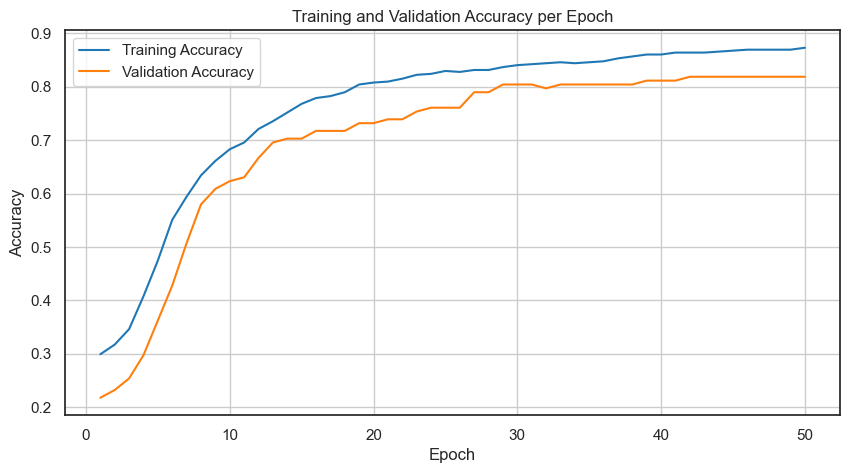

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

train_accuracies = []
val_accuracies = []
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize model with warm_start
model = MLPClassifier(hidden_layer_sizes=(128,64),
                      activation='relu',
                      solver='adam',
                      alpha=0.001,
                      batch_size=16,
                      learning_rate_init=0.0001,
                      max_iter=1,       
                      warm_start=True,  
                      random_state=42,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=5)


# Training the model
epochs = 50
for epoch in range(epochs):
    model.fit(X_train_scaled, y_train)

    # Predictions
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)

    # Accuracy
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1}/{epochs} - Training Accuracy: {train_acc*100:.2f}% | Validation Accuracy: {val_acc*100:.2f}%")

joblib.dump(model, "emotion_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model and label encoder saved successfully.")

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
from sklearn.ensemble import VotingClassifier

# Initialize models
svm = joblib.load("final_svm_model.pkl")  # already trained
mlp = joblib.load("emotion_model.pkl")    # already trained

# Ensemble (soft voting if both support predict_proba)
ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('mlp', mlp)
], voting='soft')  # use 'hard' if models don’t support predict_proba

ensemble.fit(X_train_scaled, y_train)  # X_train_scaled = from your pipeline
# Predictions
train_pred = ensemble.predict(X_train_scaled)
train_acc = accuracy_score(y_train, train_pred)
print(f"Training accuracy with ensemble: {train_acc*100:.2f}%")
val_pred = ensemble.predict(X_val_scaled)
val_acc = accuracy_score(y_val, val_pred)
print(f"Validation accuracy with ensemble: {val_acc*100:.2f}%")
# Optional: Detailed report
print(classification_report(y_val, val_pred))
# --- Save the ensemble model ---
joblib.dump(ensemble, "ensemble_model.pkl")


Training accuracy with ensemble: 99.82%
Validation accuracy with ensemble: 97.83%
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       1.00      1.00      1.00        40
           2       1.00      0.96      0.98        23
           3       0.95      1.00      0.97        37

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



c:\Users\tejas\OneDrive\Desktop\visual editor\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


['ensemble_model.pkl']

In [34]:
import pyaudio
import wave
sr=22050  
record_seconds=3
chunk=1024
channels=1

In [35]:
#Initializing pyaudio
p=pyaudio.PyAudio()

In [46]:
#Open the audio stream
stream=p.open(format=pyaudio.paInt16,channels=channels,rate=sr,input=True,output=True,frames_per_buffer=chunk)
print('* Recording *')
frames=[]

#Record audio
for i in range(0,int(sr/chunk*record_seconds)):
    data=stream.read(chunk)
    frames.append(data)
print('* Done Recording *')
stream.stop_stream()
stream.close()
p.terminate()

# Print some details about the recording
print("Channels:", channels)
print("Sample width (bytes):", p.get_sample_size(pyaudio.paInt16))
print("Sample rate (Hz):", sr)
print("Number of frames:", len(frames))

#Save the recorded audio to a file
wf=wave.open('output.wav','wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
wf.setframerate(sr)
wf.writeframes(b''.join(frames))
wf.close()

* Recording *
* Done Recording *
Channels: 1
Sample width (bytes): 2
Sample rate (Hz): 22050
Number of frames: 64


In [36]:
from IPython.display import Audio
Audio("output.wav")

In [33]:
%pip install librosa soundfile noisereduce

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Data cleaning
import librosa
import soundfile as sf

y, sr = librosa.load("output.wav", sr=None)
y_trimmed, _ = librosa.effects.trim(y)
sf.write("output_trimmed.wav", y_trimmed, sr)

In [38]:
import numpy as np
import soundfile as sf

# Load the trimmed audio
y, sr = sf.read("output_trimmed.wav")
y = y / np.max(np.abs(y))  
sf.write("output_normalized.wav", y, sr)

In [39]:
y, sr = sf.read("output_normalized.wav")
print("Shape of y:", y.shape)

if len(y.shape) == 1:
    print("Audio is mono.")
else:
    print(f"Audio is multi-channel with {y.shape[1]} channels.")

Shape of y: (64512,)
Audio is mono.


In [40]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

MFCCs shape: (13, 127)
Mel Spectrogram shape: (128, 127)


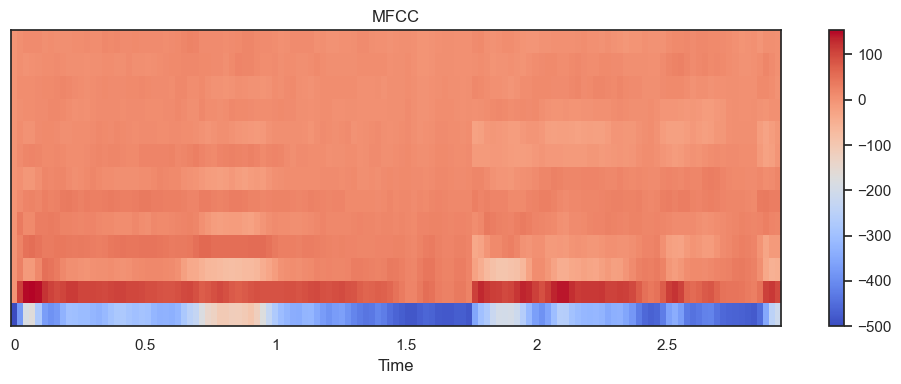

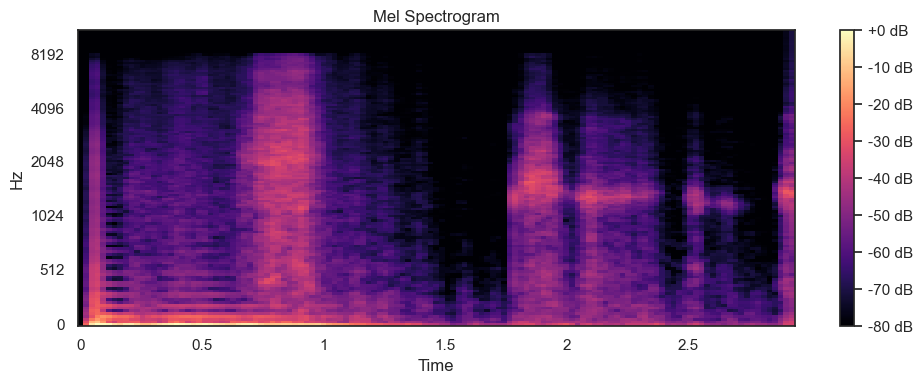

In [41]:
# Load the normalized audio
y, sr = librosa.load("output_normalized.wav", sr=None)

# 1. Extract MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCCs shape:", mfcc.shape)

# 2. Extract Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
print("Mel Spectrogram shape:", mel_spec_db.shape)

# 3. Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# 4. Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

np.save("mfccs.npy", mfcc)
np.save("mel_spec.npy", mel_spec_db)
label=0  # Dummy label for this example

In [42]:
import joblib
import numpy as np
import librosa

emotion_map = {
    0: "angry",
    1: "crying",
    2: "laughing",
    3: "neutral"
}

# Load model, and label encoder
model = joblib.load("ensemble_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")
pca = joblib.load("pca_transform.pkl")

# Load your recorded audio file
audio_path = "output_normalized.wav"
data, sr = librosa.load(audio_path, sr=16000)

# Extract features (MFCCs, pitch, energy, duration) as in training
y_trimmed, _ = librosa.effects.trim(data, top_db=25)

# MFCCs
mfcc = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=13)
mfcc_mean = np.mean(mfcc.T, axis=0)

# Pitch (Fundamental Frequency)
f0, _, _ = librosa.pyin(y_trimmed, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0_clean = np.nan_to_num(f0)
pitch_mean = np.mean(f0_clean)

# Energy
frame_length = 2048
hop_length = 512
energy = np.array([
    np.sum(np.square(y_trimmed[i:i+frame_length]))
    for i in range(0, len(y_trimmed), hop_length)
])
energy_mean = np.mean(energy)

# Duration
duration = librosa.get_duration(y=y_trimmed, sr=sr)

# Combine all features
combined_features = np.hstack([mfcc_mean, pitch_mean, energy_mean, duration])

# Scale features using the loaded scaler
combined_features_scaled = pca.transform([combined_features])  # shape: (1, n_features)

#To check the probability for each emotion
ver_probs = model.predict_proba(combined_features_scaled)
ver_raw=ver_probs[0].tolist()
print(ver_raw)

# Predict
prediction = model.predict(combined_features_scaled)
predicted_label = prediction[0]
emotion = label_encoder.inverse_transform([predicted_label])[0]
emotion_name = emotion_map.get(predicted_label, "unknown")
print("Predicted Emotion:", emotion_name)

[0.04357148769948211, 0.2350064423458999, 0.6703941266653655, 0.051027943289252496]
Predicted Emotion: laughing


<Figure size 800x600 with 0 Axes>

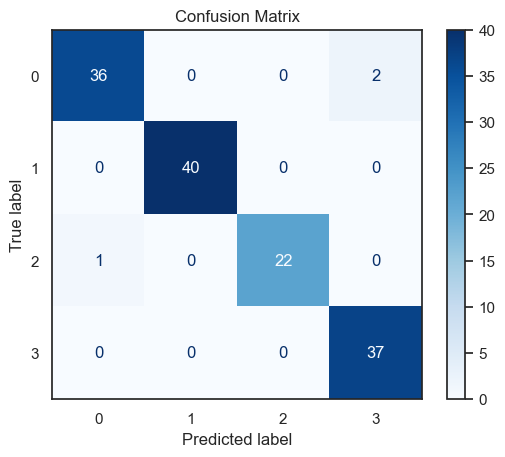

Testing Accuracy: 97.83%


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict on the validation set (or test set if you have one)
y_pred = model.predict(X_val_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print testing accuracy (already shown above)
test_accuracy = accuracy_score(y_val, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")

In [1]:
%pip install --upgrade librosa


  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.1
    Uninstalling librosa-0.10.1:
      Successfully uninstalled librosa-0.10.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiomentations 0.41.0 requires librosa!=0.10.0,<0.11.0,>=0.8.0, but you have librosa 0.11.0 which is incompatible.


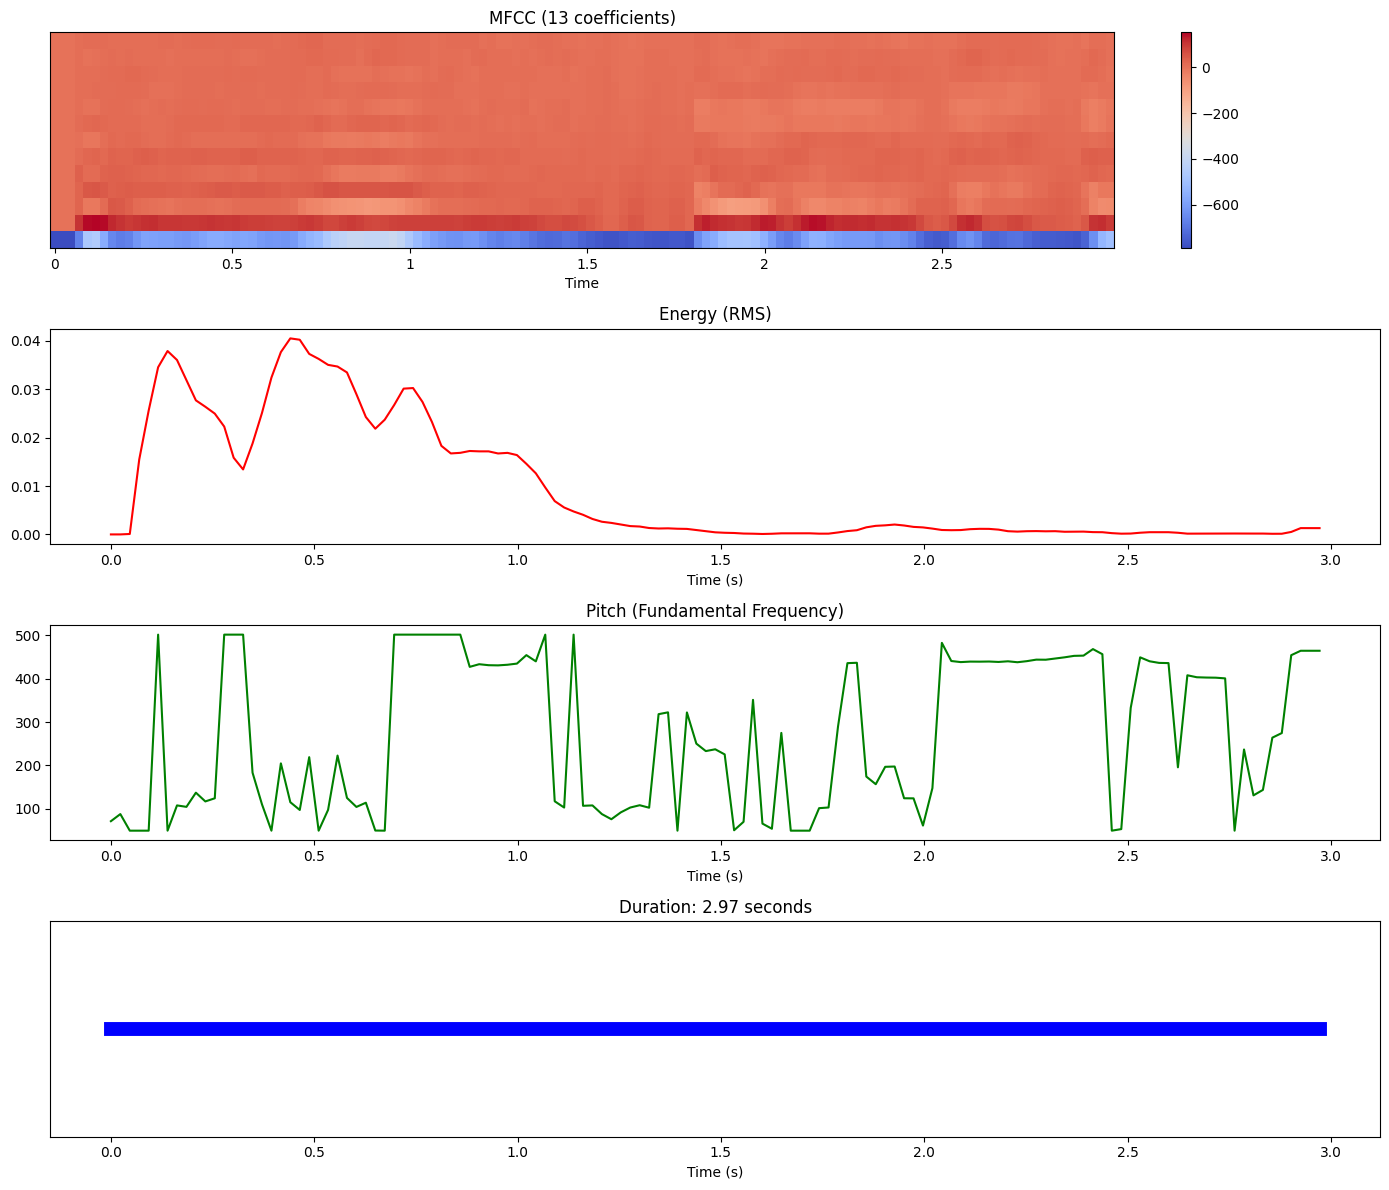

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio
audio_path = "output.wav"  # Replace with your file path
y, sr = librosa.load(audio_path, sr=None)

# --- 1. MFCC ---
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# --- 2. Energy (Root Mean Square Energy) ---
energy = librosa.feature.rms(y=y)[0]  # shape: (frames,)

# --- 3. Duration ---
duration = librosa.get_duration(y=y, sr=sr)

# --- 4. Pitch (using YIN algorithm) ---
f0 = librosa.yin(y, fmin=50, fmax=500, sr=sr)  # Pitch per frame

# --- Plotting ---
plt.figure(figsize=(14, 12))

# MFCC
plt.subplot(4, 1, 1)
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.title("MFCC (13 coefficients)")
plt.colorbar()

# Energy
frames = range(len(energy))
t_energy = librosa.frames_to_time(frames, sr=sr)
plt.subplot(4, 1, 2)
plt.plot(t_energy, energy, color='r')
plt.title("Energy (RMS)")
plt.xlabel("Time (s)")

# Pitch
frames = range(len(f0))
t_pitch = librosa.frames_to_time(frames, sr=sr)
plt.subplot(4, 1, 3)
plt.plot(t_pitch, f0, color='g')
plt.title("Pitch (Fundamental Frequency)")
plt.xlabel("Time (s)")

# Duration
plt.subplot(4, 1, 4)
plt.plot([0, duration], [1, 1], 'b', linewidth=10)
plt.title(f"Duration: {duration:.2f} seconds")
plt.yticks([])
plt.xlabel("Time (s)")

plt.tight_layout()
plt.savefig("combined_features.png", dpi=300)
plt.show()
